 <center> <font color=#0047AB><h1> Projeto Final - Redes Neurais </h1> </font>

Aluno: Guilherme Barão

Tema: Modelos não-paramétricos de classificação

Email: baraoguilherme13@gmail.com

<img src='https://ippur.com.br/wp-content/uploads/2021/07/UFRJ_HorizontalCompleta_Tela_Positivo.png' height=400 width=800 />
</center>


## Introdução

Para este projeto, escolhi um conjunto de dados sobre risco de obesidade, disponível [aqui](https://www.kaggle.com/competitions/playground-series-s4e2). Trata-se de um conjunto de dados de diversas pessoas com informações sobre seu peso, altura, histórico de obesidade na família e muitas outras variáveis, incluindo a variável resposta **nível de obesidade**. O objetivo do projeto será treinar modelos não paramétricos de classificação MLP e analisar e comparar suas performances de previsão sobre a variável resposta, tanto entre si quanto em comparação com uma simples regressão logística, para depois selecionar o melhor modelo e realizar previsões no conjunto de teste.

## Importando os dados

Importando as bibliotecas:

In [582]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

Importando os dados:

In [583]:
treino = pd.read_csv('dados/train.csv')
teste = pd.read_csv('dados/test.csv')

## Ajuste dos dados e Análise Exploratória

Conferindo o tamanho das bases de dados:

In [584]:
print(len(treino))
print(len(teste))

20758
13840


O conjunto de treino apresenta tamanho similar ao de teste, ambos parecem apresentar dados suficientes para análise.

Vamos observar com que variáveis estamos trabalhando:

In [585]:
treino.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [586]:
teste.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


Podemos observar várias colunas de diferentes tipos. Algumas categóricas, outras numéricas. Enquanto algumas são de fácil identificação, outras colunas apresentam siglas não muito intuitivas. Felizmente, temos uma descrição na fonte dos dados para nos auxiliar com esse problema:


- 'Gender', 'Age', 'Height', 'Weight' são atributos físicos
- 'family_history_with_overweight' diz se há histórico de obesidade na família
- FAVC = Há consumo frequente de comidas com muitas calorias?
- FCVC = Há consumo frequente de vegetais?
- NCP = Número de refeições principais durante o dia
- CAEC = Frequência do consumo de comida entre refeições
- SMOKE = Há uso de cigarro?
- CH20 = Consumo diário de água
- SCC = Há monitoramento do consumo de calorias?
- FAF = Tempo diário de atividade física
- TUE = Tempo de uso de eletrônicos
- CALC = Frequência de consumo de álcool
- MTRANS = Meio de transporte mais utilizado
- NObeyesdad = Nível de obesidade

Além disso, também há a coluna 'ID', que de cara já podemos eliminar, já que não tem nada a ver com a nossa variável resposta nível de obesidade. Vamos também separar as covariáveis e a variável resposta:

In [587]:
X_treino = treino.iloc[:,:-1]
y_treino = treino['NObeyesdad']

In [588]:
X_treino.drop(columns=['id'], inplace=True)
teste.drop(columns=['id'], inplace=True)

Vendo se há valores faltantes:

In [589]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Aparentemente não há nenhum valor faltante no conjunto de treino, o que é ótimo.

Observando a distribuição da variável resposta:

<Axes: xlabel='count', ylabel='NObeyesdad'>

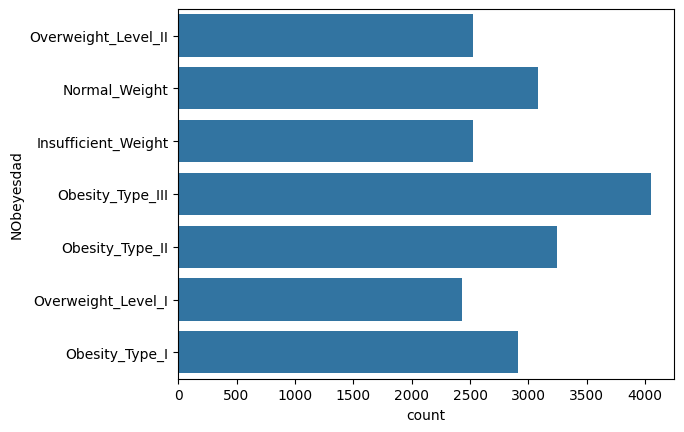

In [590]:
sns.countplot(y_treino)

Parece haver uma distribuição equilibrada com representatividade em todos os possíveis valores da variável resposta. No entanto, essa proporção não representa a realidade da população geral, visto que a grande maioria das pessoas observadas possui algum tipo de obesidade ou sobrepeso.

Um problema que podemos notar é que a variável está em formato de texto, e precisamos transformá-la em numérica. Dessa forma, parece intuitivo converter os possíveis valores para números de 0 a 6, partindo do menor nível de "obesidade" (Insufficient Weight) até o maior (Obesidade Tipo III):

In [591]:
from sklearn.preprocessing import OrdinalEncoder

def numerar_coluna(coluna, ordem):

    encoder = OrdinalEncoder(categories=[ordem]).set_output(transform="pandas")
    resultado = encoder.fit_transform(coluna)
    return resultado

In [592]:
ordem = ['Insufficient_Weight', 'Normal_Weight', 
         'Overweight_Level_I', 'Overweight_Level_II', 
         'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
y_treino_original = y_treino.copy()
y_treino = numerar_coluna(y_treino.to_frame(), ordem)
y_treino.head()

,NObeyesdad
0,3.0
1,1.0
2,0.0
3,6.0
4,3.0


Também precisamos repetir esse processo para as demais variáveis categóricas. Vamos observar com quantas estamos lidando:

In [593]:
treino.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

As variáveis "gender", "family_history_with_overweight", "favc", "smoke" e "scc" são binárias. Já as variáveis "caec", "calc" e "mtrans" são categóricas com múltiplos valores possíveis, portanto, também precisamos analisar como ordená-las.

In [594]:
print(treino['CAEC'].unique())
print(treino['CALC'].unique())
print(treino['MTRANS'].unique())

['Sometimes' 'Frequently' 'no' 'Always']
['Sometimes' 'no' 'Frequently']
['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


Podemos ver que "caec" e "calc" representam frequência, portanto, faz sentido ordená-las em ordem de frequência. Já a variável "Public_Transportation" representa apenas o meio de transporte mais utilizado, e não possui necessariamente uma ordem inerente. Dito isso, não será prejudicial se a ordenarmos levando em consideração o nível de esforço físico do transporte:

In [595]:
ordem_caec = ['no', 'Sometimes', 'Frequently', 'Always']
ordem_calc = ['no', 'Sometimes', 'Frequently', 'Always']
ordem_mtrans = ['Automobile', 'Public_Transportation', 'Motorbike', 'Walking', 'Bike']
X_treino_original = X_treino.copy()

X_treino['CAEC'] = numerar_coluna(X_treino[['CAEC']], ordem_caec)
teste['CAEC'] = numerar_coluna(teste[['CAEC']], ordem_caec)
X_treino['CALC'] = numerar_coluna(X_treino[['CALC']], ordem_calc)
teste['CALC'] = numerar_coluna(teste[['CALC']], ordem_calc)
X_treino['MTRANS'] = numerar_coluna(X_treino[['MTRANS']], ordem_mtrans)
teste['MTRANS'] = numerar_coluna(teste[['MTRANS']], ordem_mtrans)

In [596]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

X_treino['Gender'] = lb.fit_transform(X_treino['Gender'])
X_treino['family_history_with_overweight'] = lb.fit_transform(X_treino['family_history_with_overweight'])
X_treino['FAVC'] = lb.fit_transform(X_treino['FAVC'])
X_treino['SMOKE'] = lb.fit_transform(X_treino['SMOKE'])
X_treino['SCC'] = lb.fit_transform(X_treino['SCC'])
teste['Gender'] = lb.fit_transform(teste['Gender'])
teste['family_history_with_overweight'] = lb.fit_transform(teste['family_history_with_overweight'])
teste['FAVC'] = lb.fit_transform(teste['FAVC'])
teste['SMOKE'] = lb.fit_transform(teste['SMOKE'])
teste['SCC'] = lb.fit_transform(teste['SCC'])

In [597]:
X_treino.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1.0,0,2.763573,0,0.000000,0.976473,1.0,1.0
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2.0,0,2.000000,0,1.000000,1.000000,0.0,0.0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1.0,0,1.910378,0,0.866045,1.673584,0.0,1.0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1.0,0,1.674061,0,1.467863,0.780199,1.0,1.0
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1.0,0,1.979848,0,1.967973,0.931721,1.0,1.0


Agora que temos todas as variáveis em formato numérico, já podemos treinar os modelos. Antes disso, pode ser interessante fazer mais uma análise exploratória nos dados, começando pela distribuição das variáveis:

In [598]:
treino = X_treino.copy()
treino['nivel_de_obesidade'] = y_treino

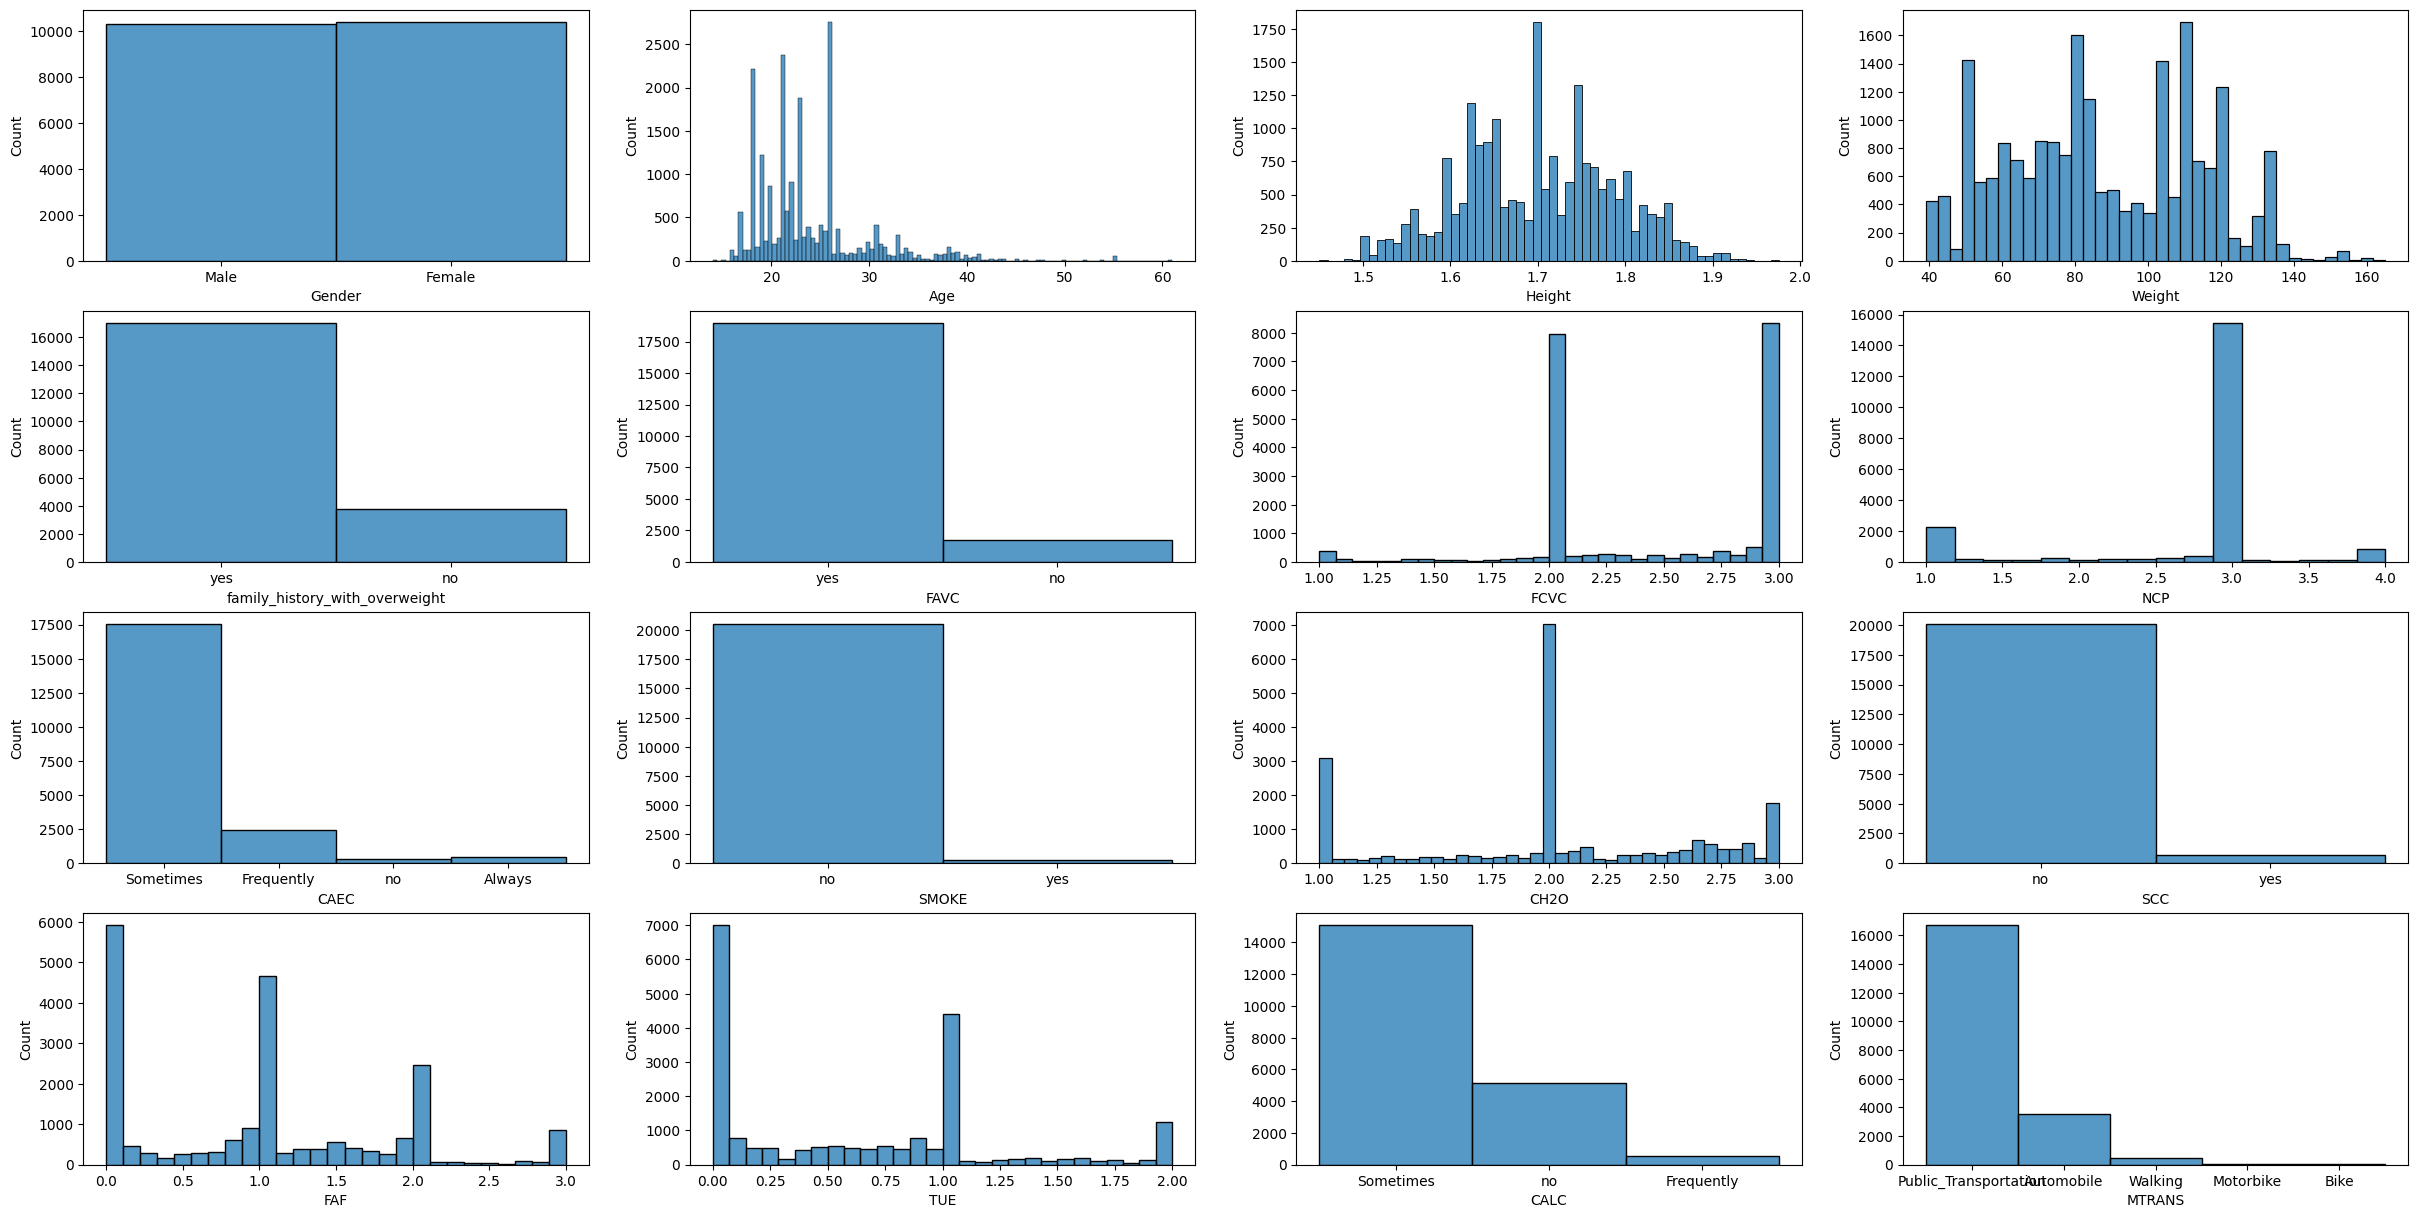

In [599]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(30, 15)
for i, column in enumerate(X_treino_original.columns):
    sns.histplot(X_treino_original[column],ax=axes[i//4,i%4])

De cara podemos observar alguns pontos interessantes nos dados: a grande maioria das pessoas possui histórico de sobrepeso na família, praticamente ninguém anda a pé/de bicicleta, e muito poucos monitoram seu consumo de calorias. Isso pode explicar a alta proporção de sobrepeso nos dados, levando em consideração que esses fatores costumam ser associados a obesidade. Em contrapartida, a grande maioria são pessoas jovens e praticamente ninguém é fumante.

Talvez seja interessante agora observar a correlação das variáveis, a fim de analisar a importância dessas descobertas.

<Axes: >

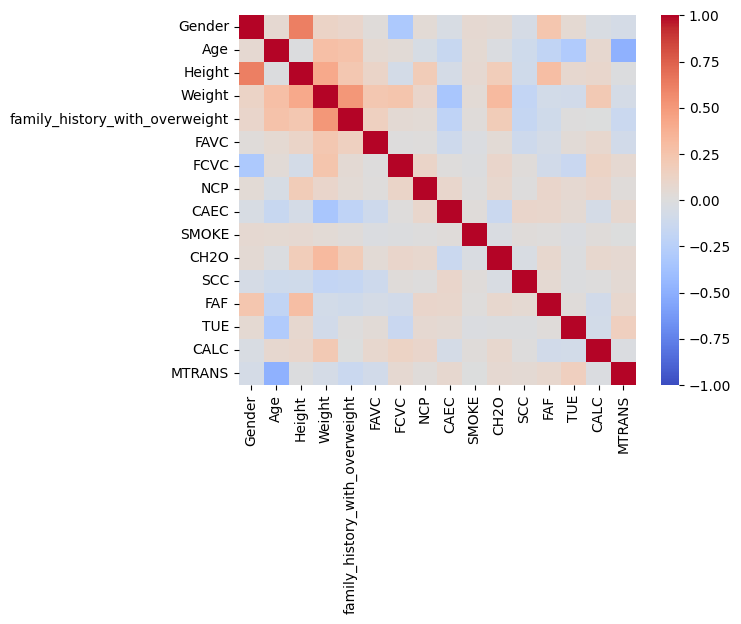

In [600]:
sns.heatmap(X_treino.corr(), cmap='coolwarm', vmin=-1, vmax=1)

Nenhuma das covariáveis parecem estar muito correlacionadas entre si, o que é bom, pois significa que provavelmente não temos variáveis redundantes. As correlações mais extremas são entre gênero e altura, o que é esperado, e entre idade e meio de transporte. Como meio de transporte é uma variável nominal e não ordinal, essa correlação não necessariamente possui significado, mas podemos observar o que está ocorrendo:

<Axes: xlabel='MTRANS', ylabel='Age'>

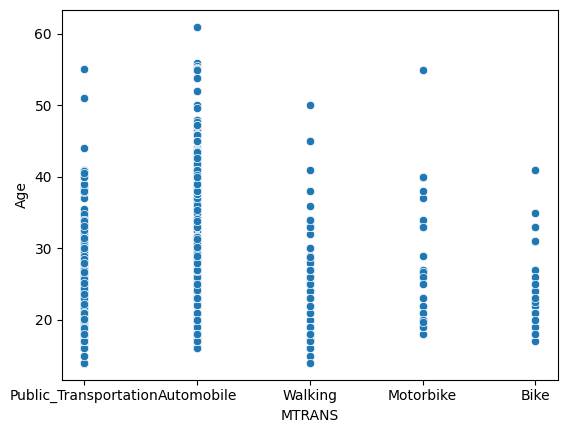

In [601]:
sns.scatterplot(y=X_treino_original['Age'],x=X_treino_original['MTRANS'])

Podemos observar que a grande maioria das pessoas mais velhas só anda de carro, enquanto motocicletas e bicicletas tem uma grande concentração nas populações mais novas, o que também faz sentido. Provavelmente é isso que está causando a correlação.

Agora vamos analisar a correlação das covariáveis com a variável resposta:

Text(0.5, 1.0, 'Correlação das variáveis com o nível de obesidade')

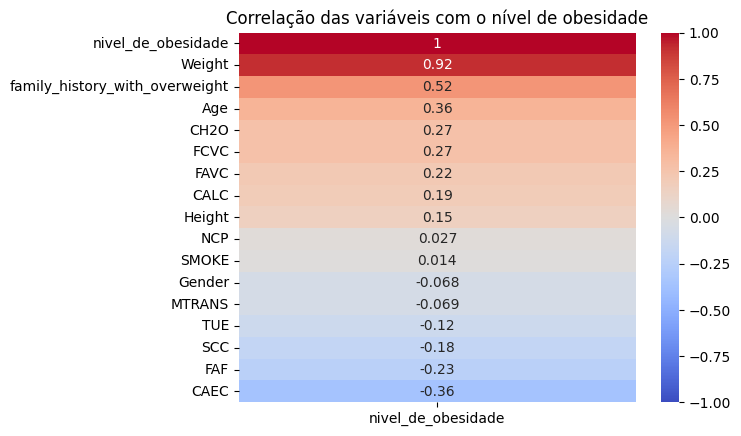

In [602]:
sns.heatmap(treino.corr()[['nivel_de_obesidade']].sort_values(by='nivel_de_obesidade', ascending=False), cmap='coolwarm', vmin=-1, vmax=1, annot=True).set_title('Correlação das variáveis com o nível de obesidade')

Como esperado, peso é de longe a variável mais correlacionada com o nível de obesidade. No entanto, diversas outras variáveis também apresentam correlação significante, como histórico de obesidade na família, idade e e frequência de alimentação entre refeições. Por outro lado, também temos muitas variáveis que parecem não estar tão relacionadas, como fumo de cigarro (o que me surpreendeu, talvez causado pelo baixíssimo número de fumantes), número de refeições principais e gênero. Talvez seja interessante utilizarmos o método stepwise de seleção de variáveis do sklearn para remover variáveis de menor importância, a fim de tornar o modelo mais rápido e prevenir overfitting.

Utilizando o método stepwise para selecionar 10 variáveis:

In [603]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
sfs = SequentialFeatureSelector(logistic, n_features_to_select=10, direction='backward')
sfs.fit(X_treino, y_treino)

c:\Users\barao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\barao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\barao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed w

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=10)

In [604]:
X_treino = X_treino[X_treino.columns[sfs.get_support()]]
teste = teste[teste.columns[sfs.get_support()]]

Com isso, vamos prosseguir para o treino dos modelos.

## Treinando modelos

Em primeiro lugar, vamos remover uma parte do conjunto de treino para validação. Utilizarei a função train_test_split do sklearn para separar 25% dos dados aleatóriamente:

In [605]:
from sklearn.model_selection import train_test_split
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X_treino, y_treino, test_size=0.25, random_state=1)

Como o conjunto de teste não possui variável resposta, sendo a precisão do modelo avaliada pela competição no Kaggle, também separarei uma pequena parte dos dados para teste:

In [606]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_treino, y_treino, test_size=0.12, random_state=1)

Definindo uma função para compilar e encaixar os modelos que serão definidos (otimizador escolhido = adam):

In [607]:
def fit_modelo(modelo):
    modelo.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    historico = modelo.fit(X_treino,
           y_treino,
           epochs=40,
           validation_data=(X_validacao, y_validacao))
    return historico

Treinando o modelo de regressão logística:

In [608]:
model0 = keras.models.Sequential([
  keras.layers.Dense(10, activation='softmax')
])

historico_logistica = fit_modelo(model0)

Epoch 1/40


429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.1214 - loss: 53.5094 - val_accuracy: 0.0119 - val_loss: 5.9426
Epoch 2/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.1762 - loss: 3.1552 - val_accuracy: 0.3782 - val_loss: 1.9684
Epoch 3/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.3909 - loss: 1.8992 - val_accuracy: 0.4543 - val_loss: 1.7576
Epoch 4/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4542 - loss: 1.7051 - val_accuracy: 0.4630 - val_loss: 1.5960
Epoch 5/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.4796 - loss: 1.5651 - val_accuracy: 0.4988 - val_loss: 1.4646
Epoch 6/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5073 - loss: 1.4406 - val_accuracy: 0.4987 - val_loss: 1.3792
Epoch 7/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.5153 - loss: 1.3430 - val_accuracy: 0.4988 - val_loss: 1.2972
Epoch 8/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5242 - loss: 1.2719 - val_accura

Treinando um modelo MLP de 1 camada:

In [609]:
model1 = keras.models.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

historico_1camada = fit_modelo(model1)

Epoch 1/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.2521 - loss: 2.5138 - val_accuracy: 0.4320 - val_loss: 1.2994
Epoch 2/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5553 - loss: 1.2143 - val_accuracy: 0.6021 - val_loss: 1.0412
Epoch 3/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.6287 - loss: 0.9937 - val_accuracy: 0.6329 - val_loss: 0.9620
Epoch 4/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.6601 - loss: 0.8782 - val_accuracy: 0.7148 - val_loss: 0.7906
Epoch 5/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.7040 - loss: 0.7848 - val_accuracy: 0.7017 - val_loss: 0.7365
Epoch 6/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.7126 - loss: 0.7354 - val_accuracy: 0.7437 - val_loss: 0.6788
Epoch 7/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.7403 - loss: 0.6762 - val_accuracy: 0.7869 - val_loss: 0.6165
Epoch 8/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7535 - loss: 0.6433 - 

Treinando um modelo MLP de 2 camadas:

In [610]:
model2 = keras.models.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

historico_2camadas = fit_modelo(model2)

Epoch 1/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2366 - loss: 2.3068 - val_accuracy: 0.5565 - val_loss: 1.2927
Epoch 2/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5686 - loss: 1.1271 - val_accuracy: 0.6426 - val_loss: 0.8759
Epoch 3/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.6632 - loss: 0.8437 - val_accuracy: 0.6829 - val_loss: 0.7843
Epoch 4/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.7240 - loss: 0.6972 - val_accuracy: 0.7915 - val_loss: 0.5938
Epoch 5/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7479 - loss: 0.6322 - val_accuracy: 0.7366 - val_loss: 0.6467
Epoch 6/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7742 - loss: 0.5833 - val_accuracy: 0.7921 - val_loss: 0.5341
Epoch 7/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.7780 - loss: 0.5611 - val_accuracy: 0.8025 - val_loss: 0.5050
Epoch 8/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7872 - loss: 0.5482 - va

Treinando um modelo MLP de 3 camadas:

In [611]:
model3 = keras.models.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

historico_3camadas = fit_modelo(model3)

Epoch 1/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2363 - loss: 2.1215 - val_accuracy: 0.5123 - val_loss: 1.0463
Epoch 2/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.6422 - loss: 0.9282 - val_accuracy: 0.7538 - val_loss: 0.6310
Epoch 3/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.7449 - loss: 0.6398 - val_accuracy: 0.7671 - val_loss: 0.5616
Epoch 4/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.7687 - loss: 0.5753 - val_accuracy: 0.7197 - val_loss: 0.6548
Epoch 5/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.7736 - loss: 0.5705 - val_accuracy: 0.6181 - val_loss: 0.7903
Epoch 6/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.7663 - loss: 0.6012 - val_accuracy: 0.7195 - val_loss: 0.6638
Epoch 7/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7815 - loss: 0.5530 - val_accuracy: 0.7767 - val_loss: 0.5753
Epoch 8/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.7824 - loss: 0.5500 - va

In [612]:
print(f"""Acurácia treino regressão logística: {max(historico_logistica.history['accuracy'])} | Acurácia validação regressão logística: {max(historico_logistica.history['val_accuracy'])}
Acurácia treino 1 camada: {max(historico_1camada.history['accuracy'])} | Acurácia validação 1 camada: {max(historico_1camada.history['val_accuracy'])}
Acurácia treino 2 camadas: {max(historico_2camadas.history['accuracy'])} | Acurácia validação 2 camadas: {max(historico_2camadas.history['val_accuracy'])}
Acurácia treino 3 camadas: {max(historico_3camadas.history['accuracy'])} | Acurácia validação 3 camadas: {max(historico_3camadas.history['val_accuracy'])}""")

Acurácia treino regressão logística: 0.7383020520210266 | Acurácia validação regressão logística: 0.7487475872039795
Acurácia treino 1 camada: 0.8262646794319153 | Acurácia validação 1 camada: 0.8364161849021912
Acurácia treino 2 camadas: 0.8371413946151733 | Acurácia validação 2 camadas: 0.8460500836372375
Acurácia treino 3 camadas: 0.838236391544342 | Acurácia validação 3 camadas: 0.8462427854537964


O modelo MLP de 3 camadas pareceu ter performado melhor num geral, sendo o melhor modelo, e todos os MLP performaram notávelmente melhor que a regressão logística. Agora testarei a precisão do MLP de 3 camadas no conjunto de teste:

In [622]:
previsoes_3camadas = model3.predict(X_teste)

 1/59 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


In [623]:
previsoes = np.argmax(previsoes_3camadas, axis=1)

In [617]:
y_teste = y_teste.squeeze().array

In [624]:
acuracia = (previsoes == y_teste).sum() / len(y_teste)

In [625]:
acuracia

0.864633493846977

Conseguimos uma acurácia de 86% no conjunto de teste, o que é muito bom. No entanto, como os 3 modelos MLP performaram de forma similar nos conjuntos de treino e validação, talvez seja interessante combinar suas previsões e ver se conseguimos uma precisão melhor no conjunto de teste:

In [627]:
previsoes_1camada = model1.predict(X_teste)
previsoes_2camadas = model2.predict(X_teste)
previsoes_3camadas = model3.predict(X_teste)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


In [628]:
medias = [previsoes_1camada, previsoes_2camadas, previsoes_3camadas]
medias = np.array(medias)
soma = np.sum(medias, axis=0)
previsoes_combinado = np.argmax(soma, axis=1)

In [629]:
acuracia_combinado = (previsoes_combinado == y_teste).sum() / len(y_teste)
print(f'Acurácia do modelo perceptron de 3 camadas: {acuracia}')
print(f'Acurácia do modelo combinado: {acuracia_combinado}')

Acurácia do modelo perceptron de 3 camadas: 0.864633493846977
Acurácia do modelo combinado: 0.8624933119315141


Nesse caso, a acurácia no conjunto de teste piorou com a combinação. Como são valores muito próximos, apenas executar o código novamente e retreinar os modelos pode alterar o vencedor dessa comparação. No entanto, para realizar as previsões finais do conjunto de teste original, manteremos o modelo de 3 camadas por ter apresentado melhor acurácia.

In [633]:
previsoes_final = model3.predict(teste)
previsoes_final = np.argmax(previsoes_final, axis=1)

433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step


Plotando a distribuição prevista pro conjunto de teste:

<Axes: ylabel='Count'>

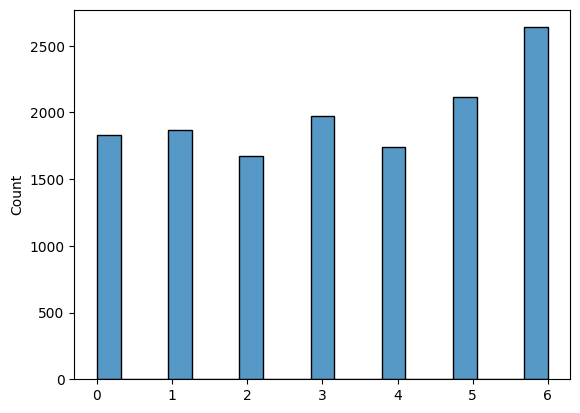

In [635]:
sns.histplot(previsoes_final)

Salvando o conjunto de teste com a variável resposta predita:

In [636]:
teste['Nível_previsto_obesidade'] = previsoes_final
teste['Nível_previsto_obesidade'] = teste['Nível_previsto_obesidade'].map({0: 'Insufficient_Weight',
                                                                            1: 'Normal_Weight',
                                                                            2: 'Overweight_Level_I',
                                                                            3: 'Overweight_Level_II',
                                                                            4: 'Obesity_Type_I',
                                                                            5: 'Obesity_Type_II',
                                                                            6: 'Obesity_Type_III'})
teste.head()

,Gender,Height,Weight,family_history_with_overweight,FAVC,SMOKE,CH2O,SCC,CALC,MTRANS,Nível_previsto_obesidade
0,1,1.848294,120.644178,1,1,0,2.825629,0,1.0,1.0,Obesity_Type_II
1,0,1.600000,66.000000,1,1,0,3.000000,0,1.0,1.0,Overweight_Level_I
2,0,1.643355,111.600553,1,1,0,2.621877,0,1.0,1.0,Obesity_Type_III
3,1,1.553127,103.669116,1,1,0,2.786417,0,1.0,1.0,Obesity_Type_I
4,0,1.627396,104.835346,1,1,0,2.653531,0,1.0,1.0,Obesity_Type_III


In [ ]:
teste.to_csv('conjunto_de_teste_com_previsões.csv')